# Handwritten Digit Recognition using Convolutional Neural Networks in Python with Keras

The mnist project is the "Hello World" of object recognition. It is a great illustration of what can be acomplished with neural network algorithms. 

The mnist dataset is large and highly pre-processed, making it easy to get started and even simple models produce prediction errors of 2% or less. The data consists of pixel values for 70,000 handwritten digits 0 - 9 from many scanned documents. 10,000 of the scanned digits are separated out as the test set.

We will try to classify each digit datum as one of the digits from 0 to 9. That makes this a multi-class classification problem.


Here, we follow the procedure presented by Jason Brownlee in his [blog] *Machine Learning Mastery*.
[blog]: http://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/


Your challenge, should you choose to accept it, is to to push prediction error below 2%. For comparison, state-of-the-art mnist studies achieve accuracies of 0.2%. 

There are many other examples of mnist analysis published to the web, including from Kaggle competitions, from which you can learn and guide your thinking.

Start out by watching this excellent and friendly introduction [video] to Neural Networks.
[video]:https://www.youtube.com/watch?v=bxe2T-V8XRs

Remember that you'll be expected to speak about every part of this project.


Keras provides convenient functions to develop deep-learning models. Keras relies on either Theano or Tensorflow to carry out low-level operations such as tensor operations.   

You will need to install the keras package (tensorflow will automatically also get installed).
At the terminal prompt, type:  
"conda install keras"   
or  
"pip install keras"  

In [2]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


A copy of the mnist dataset can be downloaded from Amazon AWS Simple Storage Service (S3). 

You can find several other datasets that are publicly available for use in machine learning projects at https://aws.amazon.com/public-datasets/

In [3]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's begin by seeing how the data looks. Each entry contains a value for each pixel in a 28 x 28 pixel square. The handwritten digits come from many scanned documents and each digit has been scaled and centered.

You may want to plot more of the data later in your analysis, as you try to optimize the analysis for detailed aspects of the data.

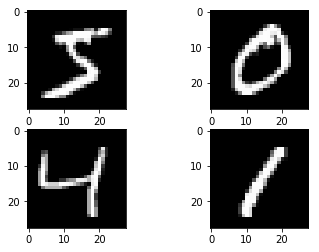

In [5]:
# plot 4 images as gray scale
plt.subplot(221)    #first plot of a 2x2 array
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

The package [keras] provides a user friendly API to implement neural networks models. We use the Sequential model, which is a linear stack of layers. To learn how to implement more complex architectures, you should use the Keras functional API. It allows you to build arbitrary graphs of layers. 
[keras]:https://keras.io/getting-started/functional-api-guide/

In [6]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

We start by [setting a random seed] so that every invocation of random numbers will give the same set. This allows us to exactly reproduce the results from one run to the next.
[setting a random seed]: http://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do

In [7]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [8]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The data comes in a 3-D array. Each row corresponds to a different scanned digit. For each row, there is a 2-D array of pixel input values representing the area of a 28x28 pixel square.

We start by analyzing our data with Keras' simplest model, the Sequential model. Learn more about the Sequential model and see [examples]. 
[examples]:https://keras.io/getting-started/sequential-model-guide/

This multi-layer perceptron model requires a 1-D array. We flatten it using the reshape() function.

We change pixel values to 32 bit type so that running our script requires less memory.

In [9]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')


It is a good idea to normalize input values whenever possible so that you can deal with values from 0 to 1. Many neural network models require it. To normalize, simply divide each value by the maximum possible value. 

Sometimes you will be able to improve your model results by finding a better normalization scheme. 

In [10]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

To further reduce memory requirements, we will convert the vector, or array, of the tend different class integers (0,1,2,3,...) into a binary matrix with just 0s and 1s.

This is called "one hot encoding;" it transforms categorical features to a format that works better with classification and regression algorithms. 

Suppose you have ‘color’ feature which can take values ‘green’, ‘red’, and ‘blue’. One hot encoding will convert this ‘color’ feature to three features, namely, ‘is_green’, ‘is_red’, and ‘is_blue’ which all are binary. See a discussion about this on [Quora].
[Quora]:https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science

Keras provides a built-in helper function to do the one hot encoding.

In [11]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Let's now define a baseline model. This first model is a simple multi-layer perceptron model. Here, we choose the neural network model parameters that can give us the best accuracy for a feasible computational cost.

It will be useful to define the model in a function so that we can obtain the model results again later without having to re-run the model. We can also use this function later to extend the model to improve our accuracy.

We use a simple neural network model with one hidden layer with one neuron per input (28^2). For the neurons in the hidden layer, we use a rectifier activation function. Check out the explanation of neural networks for a 5-year old [here].
[here]:https://stats.stackexchange.com/questions/63152/what-does-the-hidden-layer-in-a-neural-network-compute

This is an excellent [introduction] to neural networks. 
[introduction]:https://www.cheshireeng.com/Neuralyst/nnbg.htm

One hidden layer is sufficient for the large majority of problems, and adding more layers can slow down your run considerably. 

The number of neurons should usually be between the number of input points and the number of output points. Read [more].
[more]:https://web.archive.org/web/20140721050413/http://www.heatonresearch.com/node/707

For the neurons in the hidden layer, we use a rectifier activation function. Other options are tanh, sigmoid, and softplus activation functions. The activation function maps the inputs to the hidden layer output. More specifically, it produces a non-linear decision boundary via non-linear combinations of the weighted inputs. 

To learn the weights, we use the ADAM gradient descent algorithm, because it is highly efficient. For every neuron, j, in a layer, each of the i inputs, Xi, to that layer is multiplied by a previously established weight, wij.

For the neurons in the output layer, we use a softmax activation function. This function makes our outputs go from 0 to 1.0 probability values for each 0-9 digit and then selects the digit corresponding to the highest probability.

For a loss function, we use the Logarithmic type of loss function (called categorical_crossentropy in Keras).

This comprehensive Neural Networks [FAQ] is enough to make anyone an expert on NNs.
[FAQ]:ftp://ftp.sas.com/pub/neural/FAQ.html

In [12]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

We're finally ready to train and evaluate our model!

To avoid exceeding our available memory, we will split the process into 10 epochs, each of which fits the model against 200 images.

We set the test data as the validation dataset, so that we can see model performance metrics after each epoch.

We evaluate the model and print a classification error rate. You should get an error rate below 1.9%

In [13]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

# Epoch 8/10
# 13s - loss: 0.0140 - acc: 0.9968 - val_loss: 0.0632 - val_acc: 0.9801
# Epoch 9/10
# 13s - loss: 0.0110 - acc: 0.9977 - val_loss: 0.0587 - val_acc: 0.9813
# Epoch 10/10
# 13s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.0594 - val_acc: 0.9821
# Baseline Error: 1.79%

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
16s - loss: 0.2783 - acc: 0.9211 - val_loss: 0.1411 - val_acc: 0.9572
Epoch 2/10
18s - loss: 0.1115 - acc: 0.9676 - val_loss: 0.0921 - val_acc: 0.9705
Epoch 3/10
14s - loss: 0.0718 - acc: 0.9795 - val_loss: 0.0789 - val_acc: 0.9764
Epoch 4/10
14s - loss: 0.0504 - acc: 0.9859 - val_loss: 0.0762 - val_acc: 0.9763
Epoch 5/10
14s - loss: 0.0373 - acc: 0.9894 - val_loss: 0.0686 - val_acc: 0.9792
Epoch 6/10
14s - loss: 0.0269 - acc: 0.9927 - val_loss: 0.0637 - val_acc: 0.9800
Epoch 7/10
13s - loss: 0.0210 - acc: 0.9946 - val_loss: 0.0624 - val_acc: 0.9805
Epoch 8/10
13s - loss: 0.0140 - acc: 0.9968 - val_loss: 0.0632 - val_acc: 0.9801
Epoch 9/10
13s - loss: 0.0110 - acc: 0.9977 - val_loss: 0.0587 - val_acc: 0.9813
Epoch 10/10
13s - loss: 0.0082 - acc: 0.9984 - val_loss: 0.0594 - val_acc: 0.9821
Baseline Error: 1.79%


Many people have managed to classify their own hand-written digits with mnist-trained models. Recall that we chose mnist dataset because it was highly pre-processed. Understandibly, getting your data to be similar to the mnist inputs would involve a good amount of pre-processing. The loaded image must have the exact same dimensions as the data used to fit the model. For the Sequential model, you'd want to use X = X.reshape(1,784). 
You would load your image data as numpy arrays and pre-process it directly. The [sklearn.preprocessing] package provides many useful functions for this.
[sklearn.preprocessing]: http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

Afterwards, you would be able to make a prediction with the neural network (y = model.predict(x)) and use the numpy argmax() function to convert the one hot encoded output into a class index.

The Keras Sequential model gave very good results despite its simplicity. Now try out other models on the mnist dataset to achieve an even better result. Although 2% error rate, there is plenty of room for improvement. For comparison, the state-of-the-art models used on the mnist dataset achieve error rates of 0.2%. 

Be sure that you can explain why you chose your particular model and parameters. It is key that you also avoid overfitting. As discussed in this [kdnuggets] article, one of the best ways to avoid overfitting is to have at least 30 times as many training cases as there are weights in the network. 
[kdnuggets]:http://www.kdnuggets.com/2015/04/preventing-overfitting-neural-networks.html

